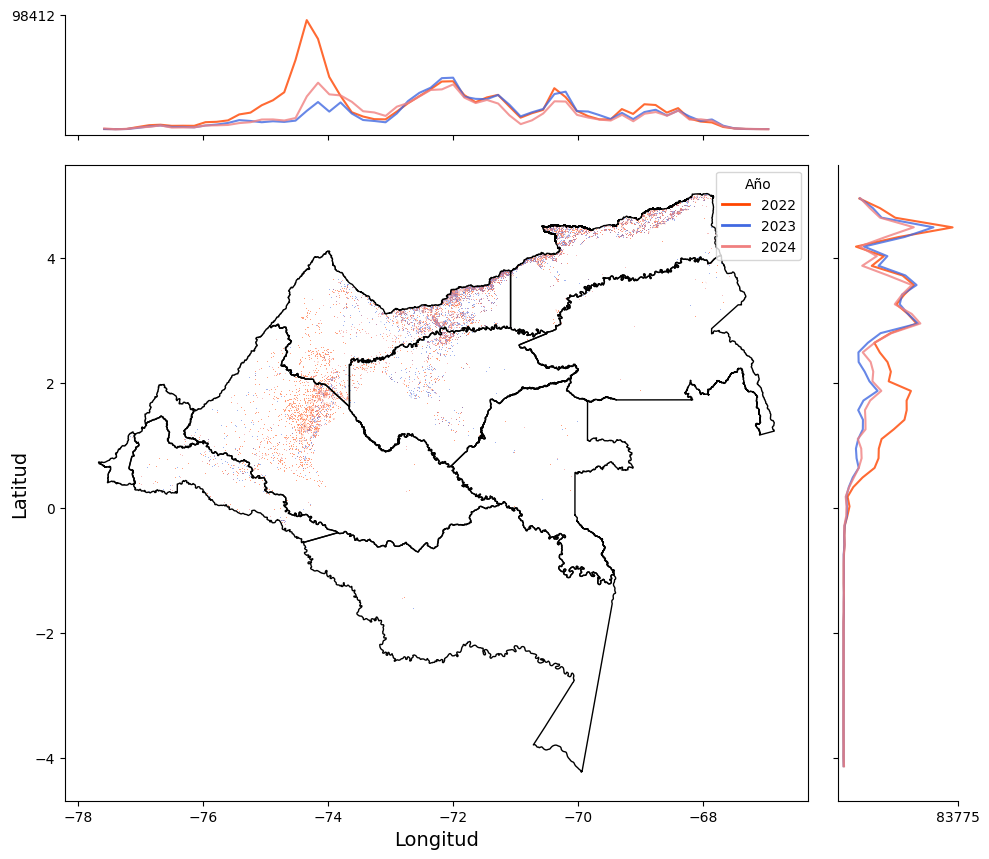

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

# Diccionario de rutas por año
data_paths = {
    2022: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2022_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2022.shp"
    },
    2023: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2023_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2023.shp"
    },
    2024: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2024_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2024.shp"
    }
}

# Colores personalizados (fácil de cambiar)
colors = {
    2022: "orangered",
    2023: "royalblue",
    2024: "lightcoral"
}

# Límite
path_limites = 'D:/Users/Luis/Documents/Luis/Gaia/actualizacion_30072025/raisg/depto_raisg.shp'
gdf_limites = gpd.read_file(path_limites)

# Leer y unir capas
points_list = []
polygons_list = []

for year, paths in data_paths.items():
    # Leer puntos
    gdf_pt = gpd.read_file(paths["pto"])
    gdf_pt["year"] = year
    points_list.append(gdf_pt)
    
    # Leer polígonos
    gdf_pol = gpd.read_file(paths["poligono"])
    gdf_pol["year"] = year
    polygons_list.append(gdf_pol)

gdf_points = gpd.GeoDataFrame(pd.concat(points_list, ignore_index=True), crs=points_list[0].crs)
gdf_polygons = gpd.GeoDataFrame(pd.concat(polygons_list, ignore_index=True), crs=polygons_list[0].crs)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 9))
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.2, pad=0.3, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.3, sharey=ax)

# Graficar polígonos en el mapa central
for year in data_paths.keys():
    gdf_polygons[gdf_polygons["year"] == year].plot(
        ax=ax, color=colors[year], alpha=0.5, edgecolor="none", linewidth=0.3
    )

# Graficar histogramas laterales usando puntos
for year in data_paths.keys():
    df_year = gdf_points[gdf_points["year"] == year]
    
    # Histograma en X (línea)
    counts_x, bins_x = np.histogram(df_year.geometry.x, bins=60)
    ax_histx.plot((bins_x[1:] + bins_x[:-1]) / 2, counts_x, color=colors[year], alpha=0.8)
    
    # Histograma en Y (línea)
    counts_y, bins_y = np.histogram(df_year.geometry.y, bins=60)
    ax_histy.plot(counts_y, (bins_y[1:] + bins_y[:-1]) / 2, color=colors[year], alpha=0.8)

# Dibujar límites
gdf_limites.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Etiquetas y título
years = sorted(data_paths.keys())
ax.set_xlabel("Longitud", fontsize=14)
ax.set_ylabel("Latitud", fontsize=14)
ax.set_title(f"Distribución de Fuegos por Año ({years[0]}-{years[-1]})", fontsize=18, weight='bold', pad=25)

# Leyenda personalizada con líneas
legend_lines = [Line2D([0], [0], color=colors[year], lw=2, label=str(year)) for year in years]
ax.legend(handles=legend_lines, title="Año", loc="upper right")

# Ajustar rangos
ax_histx.set_xlim(ax.get_xlim())
ax_histy.set_ylim(ax.get_ylim())

# Mostrar solo valor máximo en histogramas
max_x_val = int(ax_histx.get_ylim()[1])
max_y_val = int(ax_histy.get_xlim()[1])
ax_histx.set_yticks([max_x_val])
ax_histy.set_xticks([max_y_val])

# Quitar ticks y etiquetas de histogramas
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

# Quitar bordes innecesarios en gráficos de apoyo
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()


MemoryError: Unable to allocate 23.1 GiB for an array with shape (51517, 60211) and data type float64

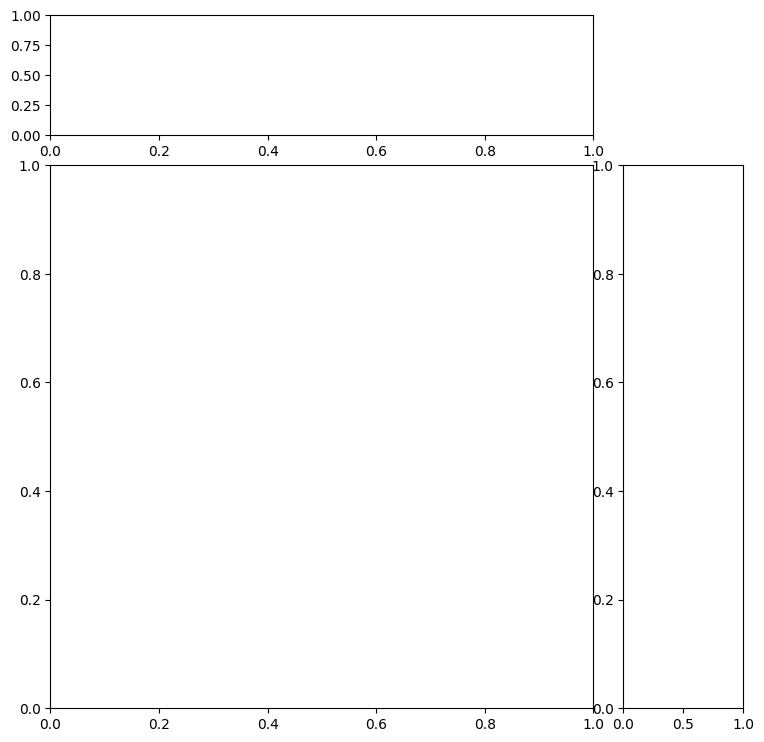

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import rasterio
from rasterio.plot import show

# Diccionario de rutas por año
data_paths = {
    2022: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2022_PT.shp",
        "raster": "D:/Users/Luis/Documents/Luis/Gaia/AMA/AMA-RAISG-QUEMAS-2022.tif"
    },
    2023: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2023_PT.shp",
        "raster": "D:/Users/Luis/Documents/Luis/Gaia/AMA/AMA-RAISG-QUEMAS-2023.tif"
    },
    2024: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2024_PT.shp",
        "raster": "D:/Users/Luis/Documents/Luis/Gaia/AMA/AMA-RAISG-QUEMAS-2024.tif"
    }
}

# Colores para los histogramas (no afecta raster)
colors = {
    2022: "orangered",
    2023: "royalblue",
    2024: "lightcoral"
}

# Límite
path_limites = 'D:/Users/Luis/Documents/Luis/Gaia/actualizacion_30072025/raisg/depto_raisg.shp'
gdf_limites = gpd.read_file(path_limites)

# Leer puntos
points_list = []
for year, paths in data_paths.items():
    gdf_pt = gpd.read_file(paths["pto"])
    gdf_pt["year"] = year
    points_list.append(gdf_pt)

gdf_points = gpd.GeoDataFrame(pd.concat(points_list, ignore_index=True), crs=points_list[0].crs)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 9))
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.2, pad=0.3, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.3, sharey=ax)

# Graficar rasters (uno encima del otro con transparencia)
for year, paths in data_paths.items():
    with rasterio.open(paths["raster"]) as src:
        raster = src.read(1).astype(float)  # asegurar float
        if src.nodata is not None:
            raster[raster == src.nodata] = np.nan  # manejar nodata
        bounds = src.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

        ax.imshow(
            raster,
            extent=extent,
            cmap="Reds",   # paleta
            alpha=0.4,     # transparencia
            origin="upper"
        )

# Histogramas laterales por año
for year in data_paths.keys():
    df_year = gdf_points[gdf_points["year"] == year]
    counts_x, bins_x = np.histogram(df_year.geometry.x, bins=60)
    ax_histx.plot((bins_x[1:] + bins_x[:-1]) / 2, counts_x, color=colors[year], alpha=0.8)
    
    counts_y, bins_y = np.histogram(df_year.geometry.y, bins=60)
    ax_histy.plot(counts_y, (bins_y[1:] + bins_y[:-1]) / 2, color=colors[year], alpha=0.8)

# Dibujar límites
gdf_limites.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Estética
years = sorted(data_paths.keys())
ax.set_xlabel("Longitud", fontsize=14)
ax.set_ylabel("Latitud", fontsize=14)
ax.set_title(f"Distribución de Fuegos con Capa Raster ({years[0]}-{years[-1]})", fontsize=18, weight='bold', pad=25)

legend_lines = [Line2D([0], [0], color=colors[year], lw=2, label=str(year)) for year in years]
ax.legend(handles=legend_lines, title="Año", loc="upper right")

ax_histx.set_xlim(ax.get_xlim())
ax_histy.set_ylim(ax.get_ylim())

max_x_val = int(ax_histx.get_ylim()[1])
max_y_val = int(ax_histy.get_xlim()[1])
ax_histx.set_yticks([max_x_val])
ax_histy.set_xticks([max_y_val])

plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

ax_histx.spines['top'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()


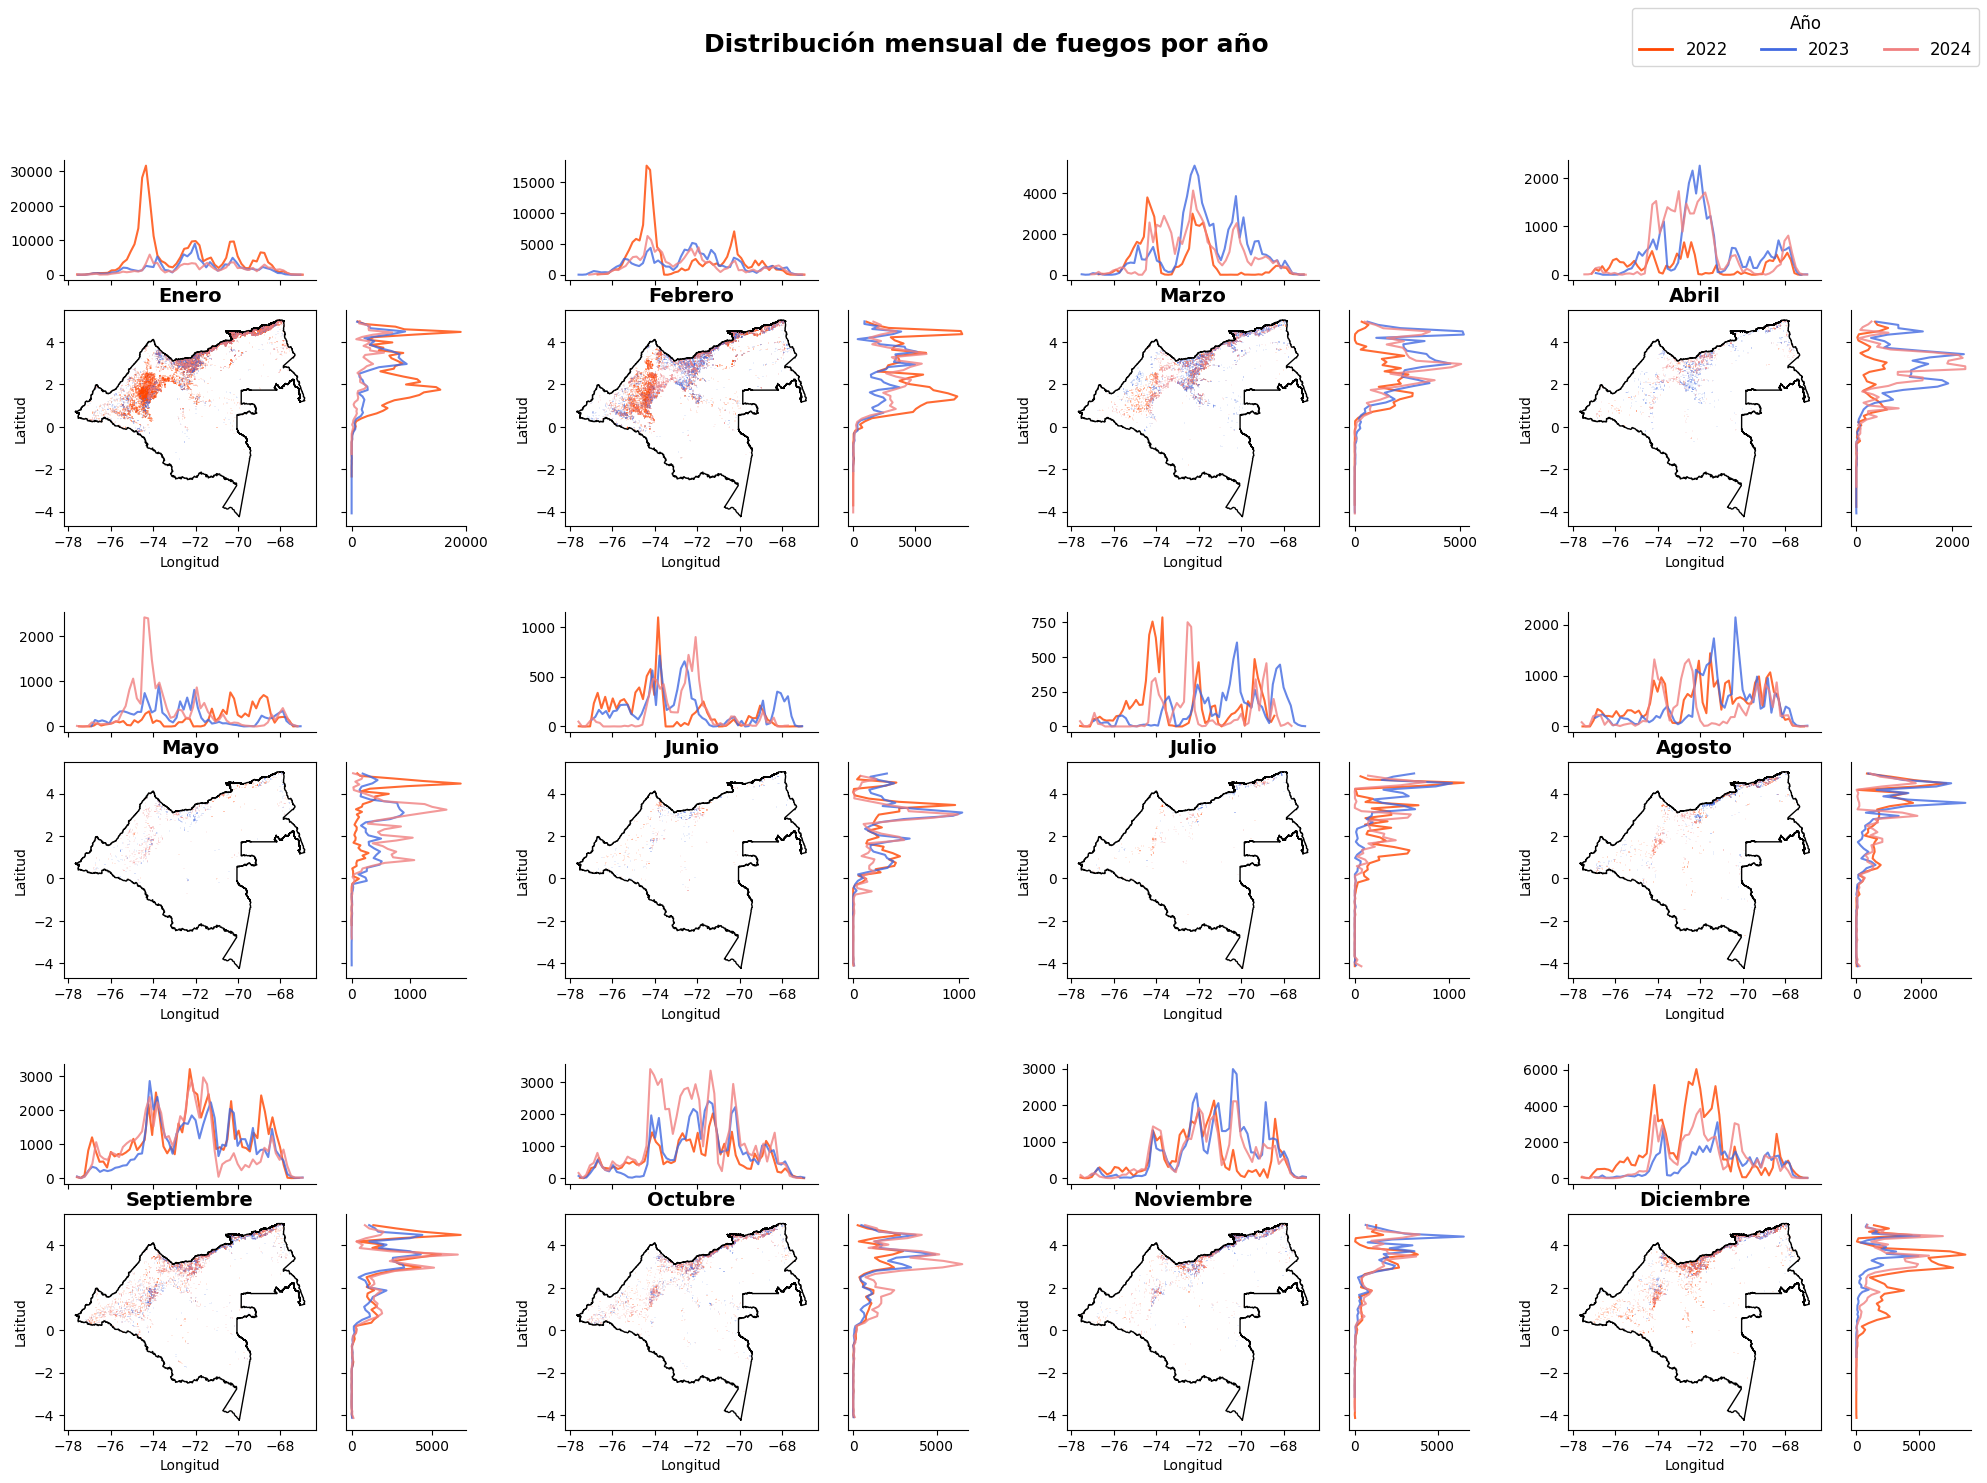

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

# ====== CONFIGURACIÓN ======
data_paths = {
    2022: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2022_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2022.shp"
    },
    2023: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2023_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2023.shp"
    },
    2024: {
        "pto": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2024_PT.shp",
        "poligono": "D:/Users/Luis/Documents/Luis/Gaia/AMA/colombia/AMA_RAISG_2024.shp"
    }
}

colors = {
    2022: "orangered",
    2023: "royalblue",
    2024: "lightcoral"
}

limites_path = 'D:/Users/Luis/Documents/Luis/Gaia/actualizacion_30072025/raisg/depto_raisg.shp'
limites_path = 'D:/Users/Luis/Documents/Luis/Gaia/actualizacion_30072025/raisg/Raisg.shp'
# Nombres de meses en español
meses_es = ["", "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
            "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# ====== LECTURA DE DATOS ======
gdf_puntos = []
gdf_poligonos = []
for year, paths in data_paths.items():
    pts = gpd.read_file(paths['pto'])
    poly = gpd.read_file(paths['poligono'])
    pts['year'] = year
    poly['year'] = year
    gdf_puntos.append(pts)
    gdf_poligonos.append(poly)

gdf_puntos = gpd.GeoDataFrame(pd.concat(gdf_puntos, ignore_index=True), crs=gdf_puntos[0].crs)
gdf_poligonos = gpd.GeoDataFrame(pd.concat(gdf_poligonos, ignore_index=True), crs=gdf_poligonos[0].crs)
gdf_limites = gpd.read_file(limites_path)
# gdf_limites = gdf_limites[gdf_limites['MACROUNIDA']=='Amazonia']
# ====== PLOTEO 3x4 ======
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for month in range(1, 13):
    row = (month - 1) // 4
    col = (month - 1) % 4
    ax_main = axes[row, col]

    divider = make_axes_locatable(ax_main)
    ax_histx = divider.append_axes("top", 1.2, pad=0.3, sharex=ax_main)
    ax_histy = divider.append_axes("right", 1.2, pad=0.3, sharey=ax_main)

    for year, color in colors.items():
        pts_month = gdf_puntos[(gdf_puntos['year'] == year) & (gdf_puntos['gridcode'] == month)]
        poly_month = gdf_poligonos[(gdf_poligonos['year'] == year) & (gdf_poligonos['gridcode'] == month)]

        # Polígonos en mapa
        poly_month.plot(ax=ax_main, color=color, alpha=0.3, edgecolor=color, linewidth=0.5)

        # Puntos para histogramas
        counts_x, bins_x = np.histogram(pts_month.geometry.x, bins=60)
        ax_histx.plot((bins_x[1:] + bins_x[:-1]) / 2, counts_x, color=color, alpha=0.8)

        counts_y, bins_y = np.histogram(pts_month.geometry.y, bins=60)
        ax_histy.plot(counts_y, (bins_y[1:] + bins_y[:-1]) / 2, color=color, alpha=0.8)

    # Dibujar límites
    gdf_limites.boundary.plot(ax=ax_main, edgecolor='black', linewidth=1)

    # Estética
    ax_main.set_title(meses_es[month], fontsize=14, weight='bold')
    ax_main.set_xlabel("Longitud")
    ax_main.set_ylabel("Latitud")

    ax_histx.set_xlim(ax_main.get_xlim())
    ax_histy.set_ylim(ax_main.get_ylim())

    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['right'].set_visible(False)

    plt.setp(ax_histx.get_xticklabels(), visible=False)
    plt.setp(ax_histy.get_yticklabels(), visible=False)

# Leyenda global
legend_lines = [Line2D([0], [0], color=color, lw=2, label=str(year)) for year, color in colors.items()]
fig.legend(handles=legend_lines, title="Año", loc="upper right", ncol=len(colors), fontsize=12, title_fontsize=12)

fig.suptitle("Distribución mensual de fuegos por año", fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("fuegos_mensuales.png", dpi=300, bbox_inches="tight")
plt.show()
